In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("voice.csv")
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [3]:
Y = data["label"]
X = data.drop("label", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
# 1. KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
out1 = knn.predict(X_test)
acc1 = accuracy_score(y_test, out1)*100
print(acc1)


72.2397476340694


In [6]:
# 2. svm
svm = SVC()
svm.fit(X_train, y_train)
out2 = svm.predict(X_test)
acc2 = accuracy_score(y_test, out2)*100
print(acc2)

67.19242902208202


In [8]:
# 3. naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

out3 = nb.predict(X_test)
acc3 = accuracy_score(y_test, out3)*100
print(acc3)

87.38170347003155


In [10]:
# 4. decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
out4 = dt.predict(X_test)
acc4 = accuracy_score(y_test, out4)*100
print(acc4)

97.63406940063092


In [11]:
# 5. random forest
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)
out5 = rfc.predict(X_test)
acc5 = accuracy_score(y_test, out5)*100
print(acc5)

98.42271293375394


In [13]:
import matplotlib.pyplot as plt

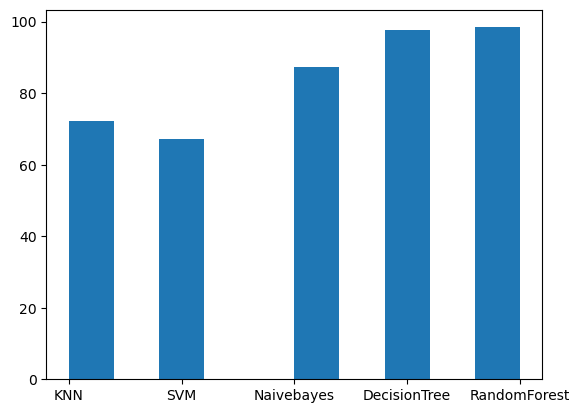

In [15]:
plt.hist(["KNN", "SVM", "Naivebayes", "DecisionTree", "RandomForest"], weights = [acc1, acc2, acc3, acc4, acc5])
plt.show()